<a href="https://colab.research.google.com/github/mochradja/DataScience/blob/main/Data_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Penjelasan masing-masing library

In [ ]:
!pip install mlxtend --upgrade 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.1 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


## Konfigurasi dan import modul
Radja

In [ ]:
!pip3 install gradio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn import datasets 
from sklearn import metrics 
from mlxtend.evaluate import bias_variance_decomp
from sklearn.naive_bayes import GaussianNB

## Import dataset, pembersihan dan scaling

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/fraud_data.xls')
df 

FileNotFoundError: ignored

In [ ]:
df.rename(columns = {'amount':'Jumlah_Transfer', 'Fraud':'Penipuan'}, inplace = True)

In [ ]:
scaler = MinMaxScaler()

columns = [
    "Saldo_Awal_Lama", 
    "Saldo_Awal_Baru", "Saldo_Tujuan_Lama",
    "Saldo_Tujuan_Baru",
    "Penipuan",
    "Jumlah_Transfer",
]

for i in columns:
    scaler.fit(df[[i]])
    df[i] = scaler.transform(df[[i]])

In [ ]:
df_baru = df[columns]
df_baru.head()

,Saldo_Awal_Lama,Saldo_Awal_Baru,Saldo_Tujuan_Lama,Saldo_Tujuan_Baru,Penipuan,Jumlah_Transfer
0,0.003912,0.0,0.000003,0.000000,1.0,0.014598
1,0.015384,0.0,0.000004,0.002429,1.0,0.057407
2,0.004234,0.0,0.009866,0.010513,1.0,0.015800
3,0.002176,0.0,0.003885,0.004220,1.0,0.008122
4,0.004827,0.0,0.000000,0.000761,1.0,0.018011


## Heatmap dan plotting Correlation

Adhit dan Delon

In [ ]:
df_baru.corr()

,Saldo_Awal_Lama,Saldo_Awal_Baru,Saldo_Tujuan_Lama,Saldo_Tujuan_Baru,Penipuan,Jumlah_Transfer
Saldo_Awal_Lama,1.000000,0.820287,0.010928,0.088509,0.096378,0.619230
Saldo_Awal_Baru,0.820287,1.000000,0.029497,0.004069,-0.164773,0.075488
Saldo_Tujuan_Lama,0.010928,0.029497,1.000000,0.962152,-0.050774,-0.000207
Saldo_Tujuan_Baru,0.088509,0.004069,0.962152,1.000000,0.010396,0.179662
Penipuan,0.096378,-0.164773,-0.050774,0.010396,1.000000,0.344038
Jumlah_Transfer,0.619230,0.075488,-0.000207,0.179662,0.344038,1.000000


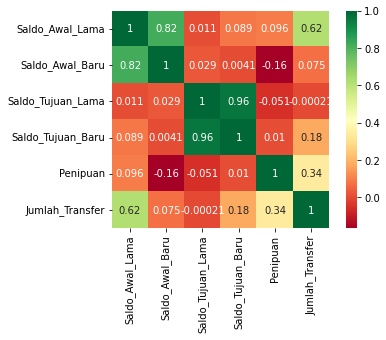

In [ ]:
sns.heatmap(df_baru.corr(), square=True, cmap='RdYlGn', annot=True)

##Menggunakan tradeoff



Adhit , Aidil, Radja, Delon

In [ ]:
model1 = svm.SVC()
model2 = LinearRegression()
model3 = KNeighborsClassifier()
model4 = GaussianNB()

In [ ]:
mse1, bias1, var1 = bias_variance_decomp(model1, X_train.values, y_train.values, X_test.values, y_test.values, loss="mse", random_seed=1)
mse2, bias2, var2 = bias_variance_decomp(model2, X_train.values, y_train.values, X_test.values, y_test.values, loss="mse", random_seed=1)
mse3, bias3, var3 = bias_variance_decomp(model3, X_train.values, y_train.values, X_test.values, y_test.values, loss="mse", random_seed=1)
mse4, bias4, var4 = bias_variance_decomp(model4, X_train.values, y_train.values, X_test.values, y_test.values, loss="mse", random_seed=1)

print('==SVM==')

print("MSE: %.3f" % mse1)
print("Bias: %.3f" % bias1)
print("Variance: %.3f" % ini
print("MSE: %.3f" % mse2)
print("Bias: %.3f" % bias2)
print("Variance: %.3f" % var2)

print("==KNeighbors Classifier==")

print("MSE: %.3f" % mse3)
print("Bias: %.3f" % bias3)
print("Variance: %.3f" % var3)

print("==GaussianNB==")

print("MSE: %.3f" % mse4)
print("Bias: %.3f" % bias4)
print("Variance: %.3f" % var4)

==SVM==
MSE: 0.193
Bias: 0.188
Variance: 0.004
==Linear Regression==
MSE: 0.194
Bias: 0.193
Variance: 0.001
==KNeighbors Classifier==
MSE: 0.055
Bias: 0.034
Variance: 0.020
==GaussianNB==
MSE: 0.367
Bias: 0.242
Variance: 0.125


In [ ]:
algorithms = {
    "KNN": KNeighborsClassifier,
    "SVM": svm.SVC,
    "NAIVE": GaussianNB
}

algorithms.items()

dict_items([('KNN', <class 'sklearn.neighbors._classification.KNeighborsClassifier'>), ('SVM', <class 'sklearn.svm._classes.SVC'>), ('NAIVE', <class 'sklearn.naive_bayes.GaussianNB'>)])

In [ ]:
scores = {
    "KNN": 0,
    "SVM": 0,
    "NAIVE": 0
}

In [ ]:
for name, algoritma in algorithms.items():
    algo = algoritma()
    algo.fit(X_train, y_train)
    scores[name] = algo.score(X_test, y_test)
    
scores

{'KNN': 0.9533333333333334, 'NAIVE': 0.6275, 'SVM': 0.8075}

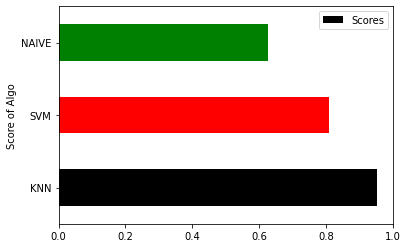

In [ ]:
df_baru = pd.DataFrame({
    "Algoritma": scores.keys(), "Scores": scores.values()
})

df_baru.plot(
    x="Algoritma",
    y="Scores",
    kind="barh",
    xlabel="Score of Algo",
    color=["black", "red", "green"]
    
)

In [ ]:
model3 = KNeighborsClassifier()
dataset = {
    "random_state": [], 
    "mse": [],
    "bias": [],
    "variance": []
}
for i in range(1, 11):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=i)
    mse, bias, var = bias_variance_decomp(model3, X_train.values, y_train.values, X_test.values, y_test.values, loss="mse", random_seed=100)
    dataset['random_state'].append(i)
    dataset['mse'].append(mse)
    dataset['bias'].append(bias)
    dataset['variance'].append(var)


#random_state_knn = dataset['random_state'].append(i)
#mse_knn = dataset['mse'].append(mse)
#bias_knn = dataset['bias'].append(bias)
#variance_knn = dataset['variance'].append(var)
df3 = pd.DataFrame(dataset)
df3

,random_state,mse,bias,variance
0,1,0.061463,0.040567,0.020896
1,2,0.066025,0.042511,0.023514
2,3,0.061071,0.039350,0.021721
3,4,0.053342,0.033486,0.019856
4,5,0.067967,0.044895,0.023072
5,6,0.060537,0.039371,0.021166
6,7,0.062462,0.040974,0.021489
7,8,0.056204,0.035193,0.021011
8,9,0.057754,0.039643,0.018112
9,10,0.054096,0.033788,0.020308


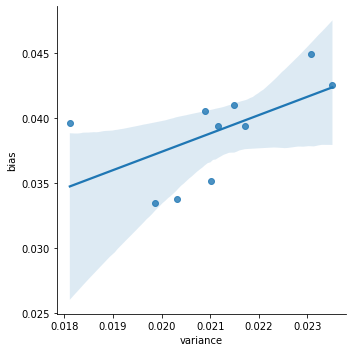

In [ ]:
sns.lmplot(x='variance', y='bias', data=df3)

plt.show()

# KNN ALGORITHM

Delon

In [ ]:
X = df_baru[['Jumlah_Transfer', 'Saldo_Awal_Lama', 'Saldo_Awal_Baru', 'Saldo_Tujuan_Lama', 'Saldo_Tujuan_Baru']]
y = df_baru['Penipuan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
KNN_model = knn(n_neighbors=5)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_predict = KNN_model.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test, y_predict) * 100

95.33333333333334

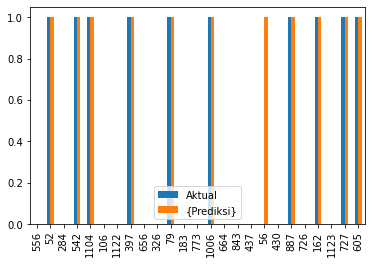

In [ ]:
evaluate = pd.DataFrame({'Aktual': y_test.values.flatten(), '{Prediksi}': y_predict.flatten()})
evaluate.sample(25).plot(kind='bar')

In [ ]:
X_test

,Jumlah_Transfer,Saldo_Awal_Lama,Saldo_Awal_Baru,Saldo_Tujuan_Lama,Saldo_Tujuan_Baru
2177,0.027527,0.020334,0.037855,0.000324,0.002238
2382,0.013764,0.190553,0.265351,0.005374,0.004781
1715,0.101086,0.027089,0.000000,0.000000,0.000000
2303,0.022504,0.237988,0.333350,0.002682,0.002566
822,0.017162,0.004599,0.000000,0.000000,0.000000
...,...,...,...,...,...
373,0.042617,0.011421,0.000000,0.000000,0.000000
2030,0.020612,0.010329,0.021655,0.001174,0.000301
1115,0.005256,0.001408,0.000000,0.000000,0.000222
2555,0.002552,0.001328,0.000880,0.000000,0.000000


In [ ]:
KNN_model.predict([[0.101086, 0.027089, 0.000000, 0.000000, 0.000000]])[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


1.0

In [ ]:
def filter_records(records):
    scaler = MinMaxScaler()

    columns = [
        "Saldo_Awal_Lama", 
        "Saldo_Awal_Baru", "Saldo_Tujuan_Lama",
        "Saldo_Tujuan_Baru",
        "Jumlah_Transfer",
    ]
    
    for i in columns:
        scaler.fit(records[[i]])
        records[i] = scaler.transform(records[[i]])
    return KNN_model.predict([[0.101086, 0.027089, 0.000000, 0.000000, 0.000000]])[0]
    


demo = gr.Interface(
    filter_records,
    [
        gr.Dataframe(
            headers=["Jumlah_Transfer", "Saldo_Awal_Lama", "Saldo_Awal_Baru", "Saldo_Tujuan_Lama", "Saldo_Tujuan_Baru"],
            datatype=["number"] * 5,
            row_count=(1, "fixed"),
            col_count=(5, "fixed")
        )
    ],
    "number",
)

demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://25023.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f3367fd50d0>,
 'http://127.0.0.1:7861/',
 'https://25023.gradio.app')